# A self-learning exercise
### Foray into sorting algorithms and their performance.
I wanted to learn more about computer science in an ab initio and exploratory manner. Sorting algorithms are a part of that journey and so in this project, I write some popular ones from scratch and create a way to test and measure their performance with my own implementations. The methods may be slightly flawed as not all sorting algorithms will have the same degree of optimization.

KeyboardInterrupt: 

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

import random
from typing import List
import timeit
import time


KeyboardInterrupt: 

Writing all of the sorting algorithms below


In [6]:
def merge_sort(arr: List) -> List:
    #Base case is trivially sorted unitary array
    if len(arr) <= 1:
        return arr

    #We split the array in half and stitch back sorted half arrays.
    mid = len(arr)//2
    left = arr[:mid]
    right = arr[mid:]
    #print(f"Splitting up array into {left} and {right} and sorting each.")

    sorted_left = merge_sort(left)
    sorted_right = merge_sort(right)

    #print(f"Stitching {sorted_left} and {sorted_right} back together")

    i = 0
    j = 0

    result = []
    #Taking advantage of the fact that they're sorted already, it's easy to generate an overall sorted array using a two pointer algorithm

    #As long as we have remaining elements in the array
    while i < len(sorted_left) and j < len(sorted_right):
        if sorted_left[i] < sorted_right[j]:
            result.append(sorted_left[i])
            i += 1
        else:
            result.append(sorted_right[j])
            j += 1
 
    if i >= len(sorted_left):
        result += sorted_right[j:]
    elif j >= len(sorted_right):
        result += sorted_left[i:]

    #print(f"Array stitching complete: {result}")

    return result


def quicksort(arr: List, pivot_point: int = -1) -> List:
    if not arr or len(arr) <= 1:
        return arr

    pivot_point = -1
    pivot = arr[pivot_point]
    #print(f"Choosing pivot {pivot} at index {pivot_point}")
    middle = [x for x in arr if x == pivot]
    less = [x for x in arr if x < pivot]
    greater = [x for x in arr if x > pivot]
    #print(f"Splitting array into {less}, {middle}, and {greater}")

    result = quicksort(less) + quicksort(middle) + quicksort(greater)
    return result


def selection_sort(arr: List) -> List:
    # Go through the array and find the minimum element of the remainder of the array and place it to the front by swapping.
    for i in range(len(arr)):
        min_index = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j

        arr[i], arr[min_index] = arr[min_index], arr[i]

    return arr


def insertion_sort(arr: List) -> List:
        
    for i in range(1, len(arr)):
        current_value = arr[i]
        j = i
        # Check through the sorted portion of the list for the right spot to insert
        while j > 0 and arr[j-1] > arr[j]:
            #keep swapping the element back as long as the previous one is greater than it.
            arr[j], arr[j-1] =  arr[j-1], arr[j]
            j -= 1

    return arr

Writing some code to test the sorting algorithms

In [41]:
class AlgoTest:


    def __init__(self, n: int, algorithms: List = [], num_runs: int = 1000):
        self._n = int(n) if type(n) is float else n
        self._algorithms = algorithms
        self._nums = list(range(n))
        self._runtimes = dict(zip([x.__name__ for x in algorithms], [0]*len(algorithms)))
        self._num_runs = num_runs
    

    def _pre_sort(self, x: float):
        #x is the approximate proportion of elements of the array that will already be sorted if it is between 0 and 1
        #otherwise, it's the number of elements to keep sorted
        nums = self._nums.copy()
        if 0 < x <= 1:
            shuffle_count = int((1 - x) * self._n)//2
        elif x > 1:
            shuffle_count = int(self._n - x)
        else:
            shuffle_count = 0

        for _ in range(shuffle_count):
            i = random.randint(0, self._n-1)
            j = random.randint(0, self._n-1)
            nums[i], nums[j] = nums[j], nums[i]

        return nums
    

    def benchmark(self, f, arr):
        s = f"{f.__name__}({arr})"
        result = min(timeit.repeat(s, globals=globals(), number = self._num_runs, repeat=5))
        return result


    def run_test(self, arr: List = []) -> None:
        if arr == []:
            arr = self._nums
        for algorithm in self._algorithms:
            runtime = self.benchmark(algorithm, arr)
            self._runtimes[algorithm.__name__] = runtime
        return
    

    def runtimes(self):
        self.run_test()
        return self._runtimes





In [64]:
array_sizes = [int(10**x) for x in range(1, 9, 2)]
results = pd.DataFrame()
for size in array_sizes:
    Test = AlgoTest(size, [merge_sort, quicksort, selection_sort, insertion_sort])
    result = Test.runtimes()
    df = pd.DataFrame(result, index=[size])
    results = pd.concat([results, df])



RecursionError: maximum recursion depth exceeded

<Axes: >

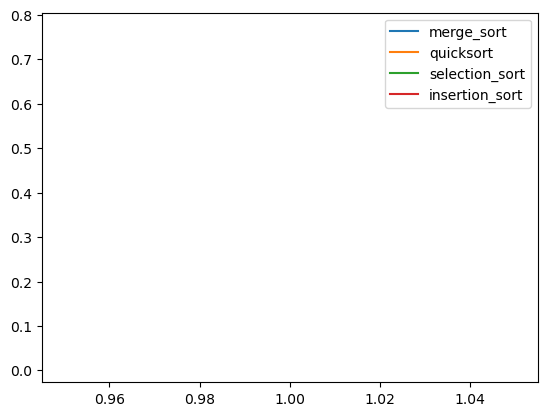

<BarContainer object of 4 artists>

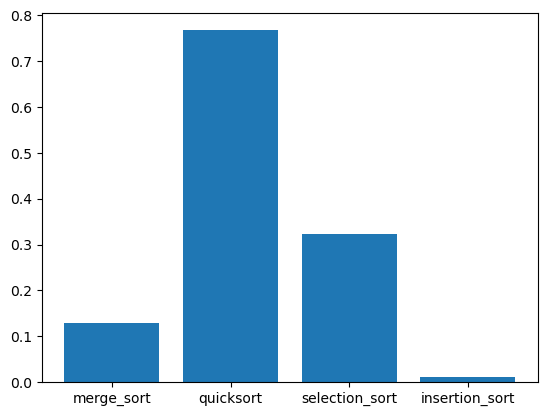